In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [71]:
'''
Data was calculated from 10 values per feature:
    a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

Each resulting in:
    a) Mean
    b) Standard Error
    c) "Worst" or the mean of the 3 largest values
'''
# Creating column names for expanded feature dataset
feature_attributes = ['Mean', 'Standard Error', 'Worst']
data_features = ["Radius ", "Texture ", "Perimeter ", "Area ", "Smoothness ", "Compactness ", "Concavity ", "Concave Points ", "Symmetry ", "Fractal Dimension "]
data_col_names = ["ID", "Diagnosis"]
for attribute in feature_attributes:
    for feature in data_features:
        data_col_names.append(feature + attribute)

#Pull expanded dataset
raw_data = pd.read_csv('../raw_data/wdbc.data.csv', names=data_col_names)
raw_data.head()

ID Diagnosis  Radius Mean  Texture Mean  Perimeter Mean  Area Mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   Smoothness Mean  Compactness Mean  Concavity Mean  Concave Points Mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  Radius Worst  Texture Worst  Perimeter Worst  Area Worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   Smoothness Worst  Compactness Worst  Concavity Worst  Concave Points Worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   Symmetry Worst  Fractal Dimension Worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [72]:
#Change the Diagnosis value from B or M to 0 or 1
raw_data["Diagnosis"] = raw_data["Diagnosis"].replace({"B": 0, "M": 1})

#Drop the ID column
raw_data.drop("ID",axis = 1,inplace = True)

raw_data.head()

Diagnosis  Radius Mean  Texture Mean  Perimeter Mean  Area Mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   Smoothness Mean  Compactness Mean  Concavity Mean  Concave Points Mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   Symmetry Mean  ...  Radius Worst  Texture Worst  Perimeter Worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   Area Worst  Smoothness Worst  Compactness Worst  Concavity Worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   Concave Points Worst  Symmetry Worst  Fractal Dimension Worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [73]:
print(raw_data.isna().sum())

Diagnosis                           0
Radius Mean                         0
Texture Mean                        0
Perimeter Mean                      0
Area Mean                           0
Smoothness Mean                     0
Compactness Mean                    0
Concavity Mean                      0
Concave Points Mean                 0
Symmetry Mean                       0
Fractal Dimension Mean              0
Radius Standard Error               0
Texture Standard Error              0
Perimeter Standard Error            0
Area Standard Error                 0
Smoothness Standard Error           0
Compactness Standard Error          0
Concavity Standard Error            0
Concave Points Standard Error       0
Symmetry Standard Error             0
Fractal Dimension Standard Error    0
Radius Worst                        0
Texture Worst                       0
Perimeter Worst                     0
Area Worst                          0
Smoothness Worst                    0
Compactness 

In [74]:
raw_data.dtypes

Diagnosis                             int64
Radius Mean                         float64
Texture Mean                        float64
Perimeter Mean                      float64
Area Mean                           float64
Smoothness Mean                     float64
Compactness Mean                    float64
Concavity Mean                      float64
Concave Points Mean                 float64
Symmetry Mean                       float64
Fractal Dimension Mean              float64
Radius Standard Error               float64
Texture Standard Error              float64
Perimeter Standard Error            float64
Area Standard Error                 float64
Smoothness Standard Error           float64
Compactness Standard Error          float64
Concavity Standard Error            float64
Concave Points Standard Error       float64
Symmetry Standard Error             float64
Fractal Dimension Standard Error    float64
Radius Worst                        float64
Texture Worst                   

In [75]:
# Scale the data (0-1)
def scale_dateframe(df):
    scaled_df = pd.DataFrame()
    for column in df.columns:
        scaled_df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
    return scaled_df

scaled_df = scale_dateframe(raw_data)

scaled_df.head()

Diagnosis  Radius Mean  Texture Mean  Perimeter Mean  Area Mean  \
0        1.0     0.521037      0.022658        0.545989   0.363733   
1        1.0     0.643144      0.272574        0.615783   0.501591   
2        1.0     0.601496      0.390260        0.595743   0.449417   
3        1.0     0.210090      0.360839        0.233501   0.102906   
4        1.0     0.629893      0.156578        0.630986   0.489290   

   Smoothness Mean  Compactness Mean  Concavity Mean  Concave Points Mean  \
0         0.593753          0.792037        0.703140             0.731113   
1         0.289880          0.181768        0.203608             0.348757   
2         0.514309          0.431017        0.462512             0.635686   
3         0.811321          0.811361        0.565604             0.522863   
4         0.430351          0.347893        0.463918             0.518390   

   Symmetry Mean  ...  Radius Worst  Texture Worst  Perimeter Worst  \
0       0.686364  ...      0.620776       0.141525         0.668310   
1       0.379798  ...      0.606901       0.303571         0.539818   
2       0.509596  ...      0.556386       0.360075         0.508442   
3       0.776263  ...      0.248310       0.385928         0.241347   
4       0.378283  ...      0.519744       0.123934         0.506948   

   Area Worst  Smoothness Worst  Compactness Worst  Concavity Worst  \
0    0.450698          0.601136           0.619292         0.568610   
1    0.435214          0.347553           0.154563         0.192971   
2    0.374508          0.483590           0.385375         0.359744   
3    0.094008          0.915472           0.814012         0.548642   
4    0.341575          0.437364           0.172415         0.319489   

   Concave Points Worst  Symmetry Worst  Fractal Dimension Worst  
0              0.912027        0.598462                 0.418864  
1              0.639175        0.233590                 0.222878  
2              0.835052        0.403706                 0.213433  
3              0.884880        1.000000                 0.773711  
4              0.558419        0.157500                 0.142595  

[5 rows x 31 columns]

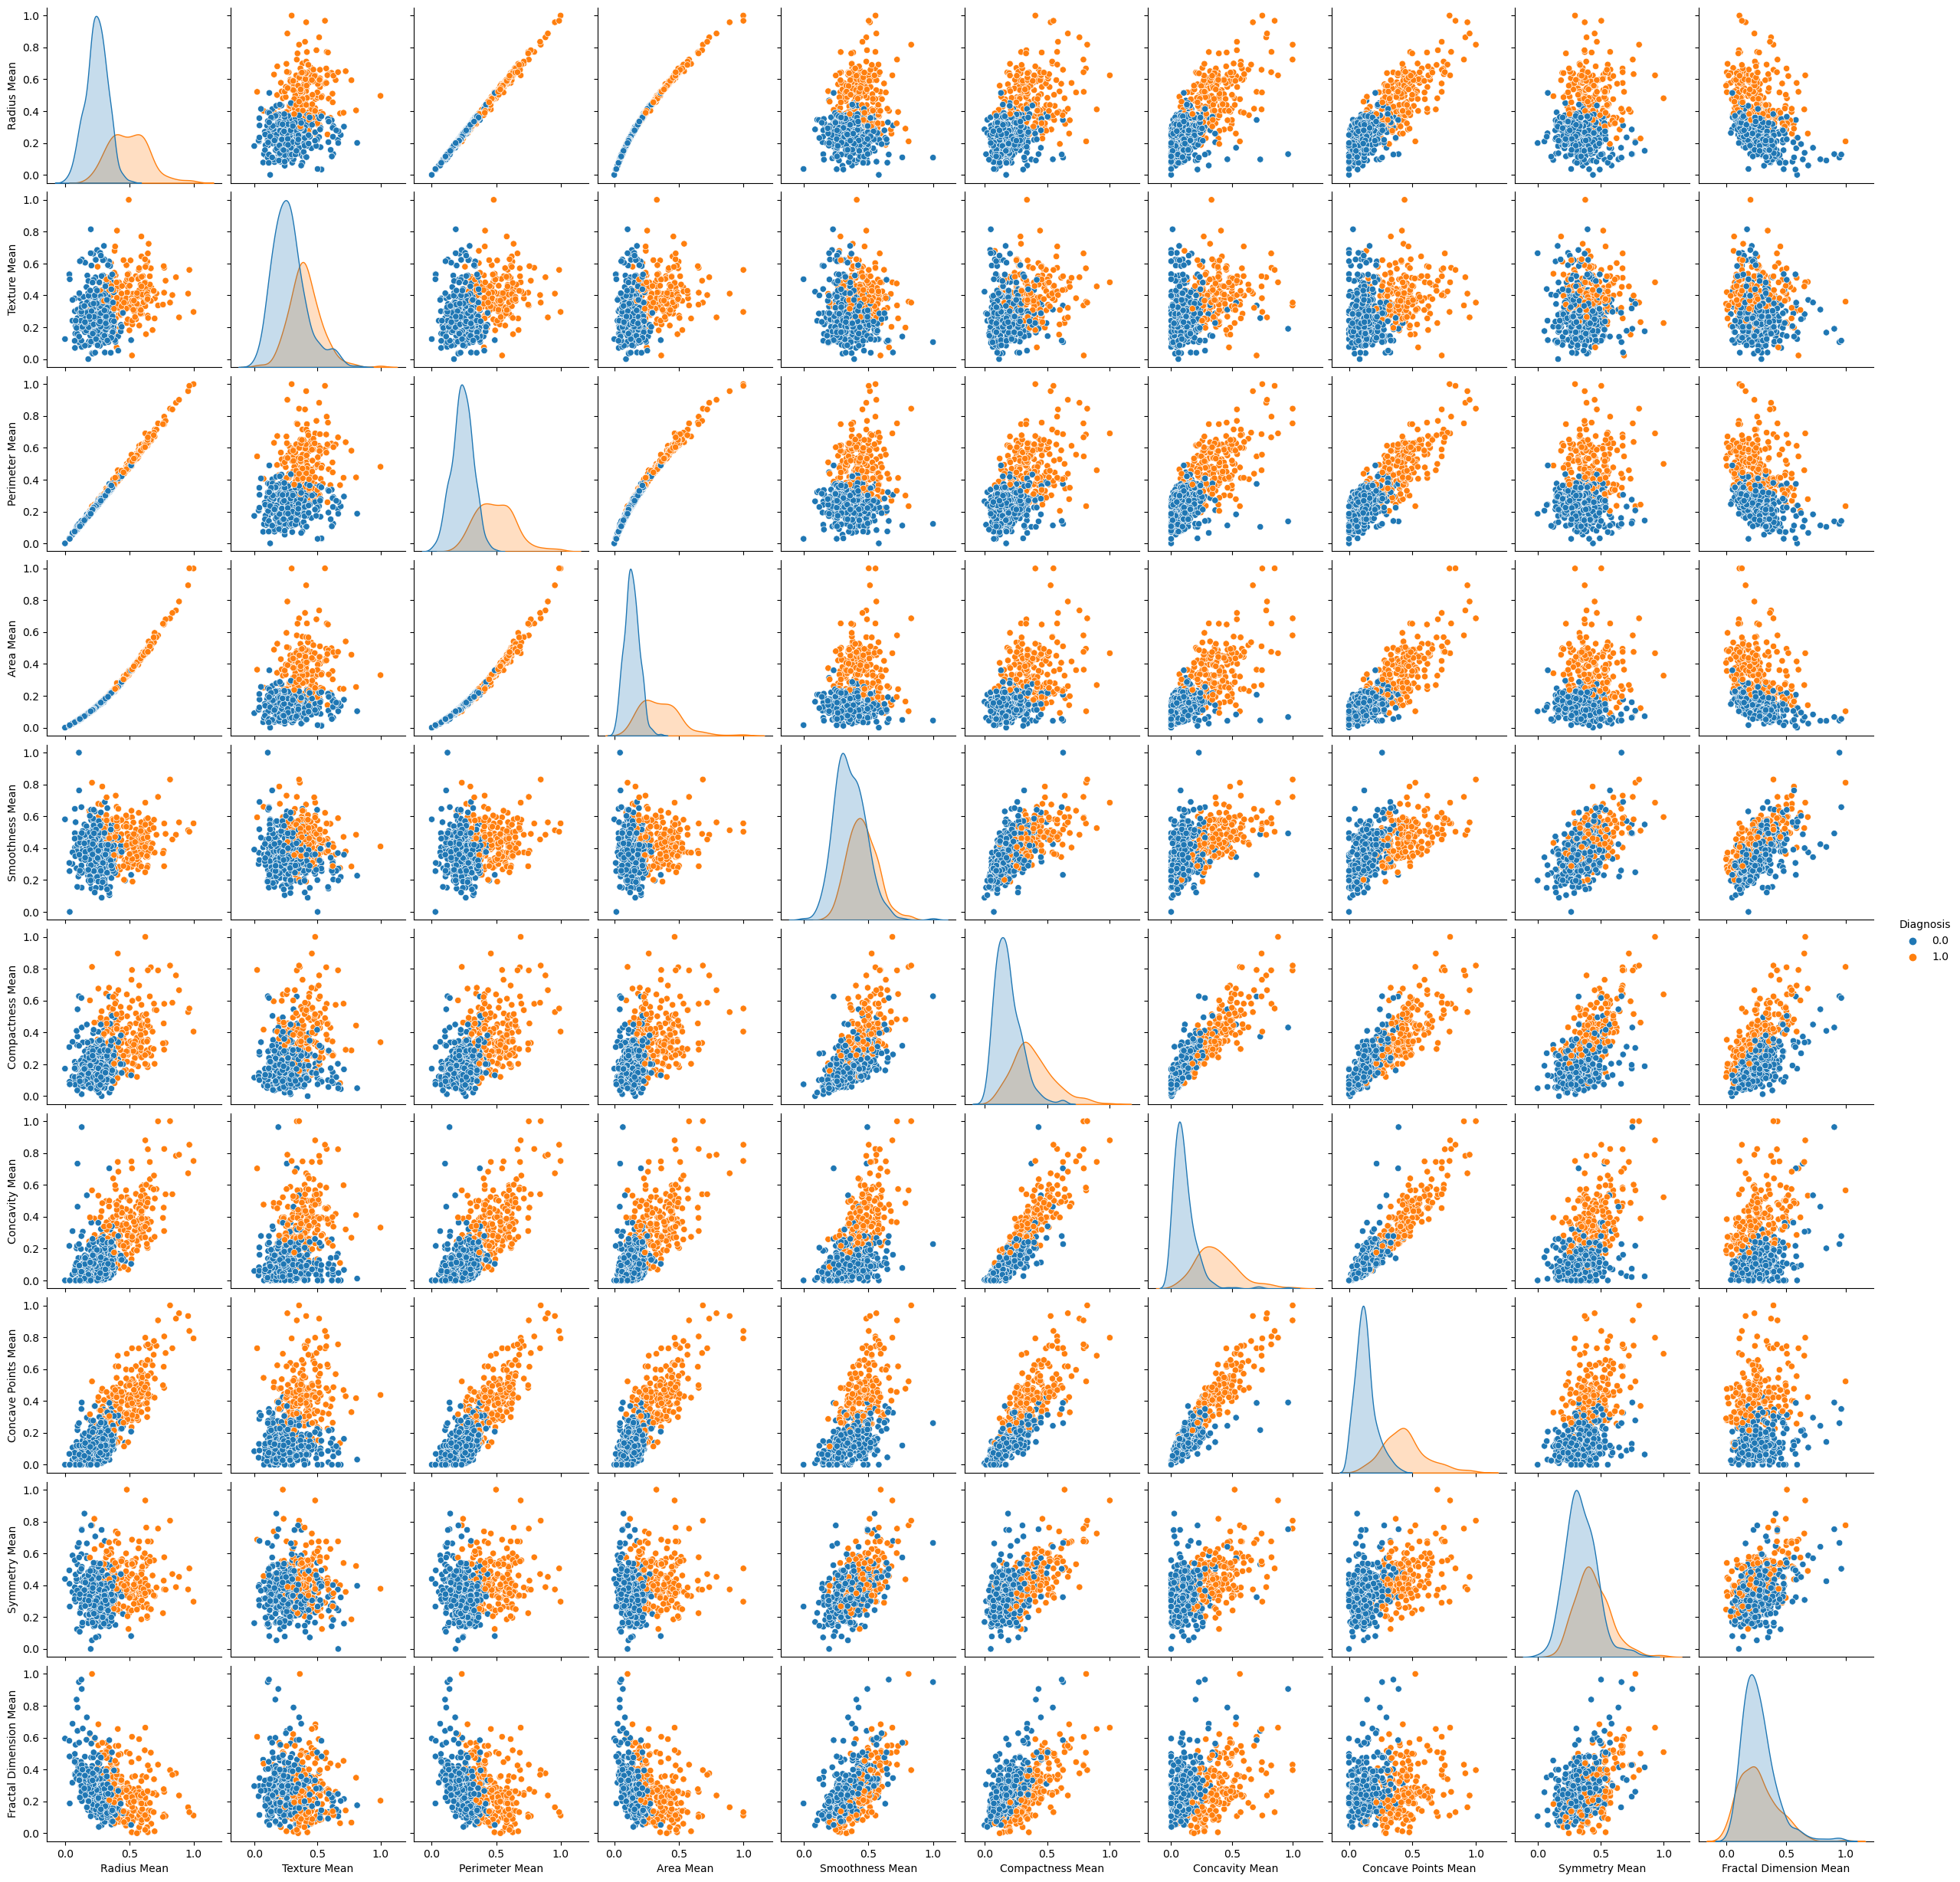

In [76]:
cols = ['Diagnosis',
        'Radius Mean', 
        'Texture Mean', 
        'Perimeter Mean', 
        'Area Mean', 
        'Smoothness Mean', 
        'Compactness Mean', 
        'Concavity Mean',
        'Concave Points Mean', 
        'Symmetry Mean', 
        'Fractal Dimension Mean']
sns.pairplot(scaled_df[cols], hue = 'Diagnosis');

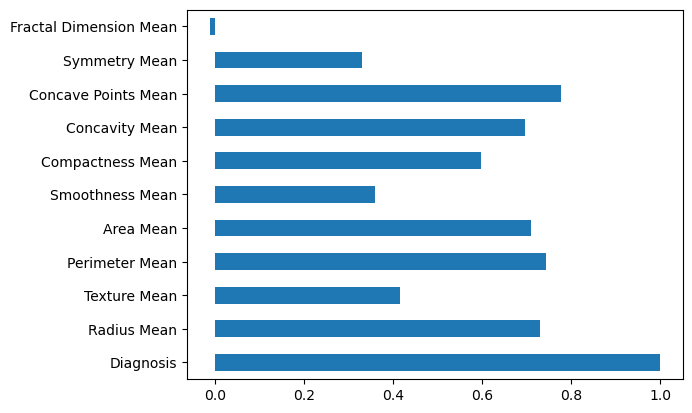

In [77]:
scaled_df[cols].corrwith(scaled_df['Diagnosis']).plot(kind='barh');

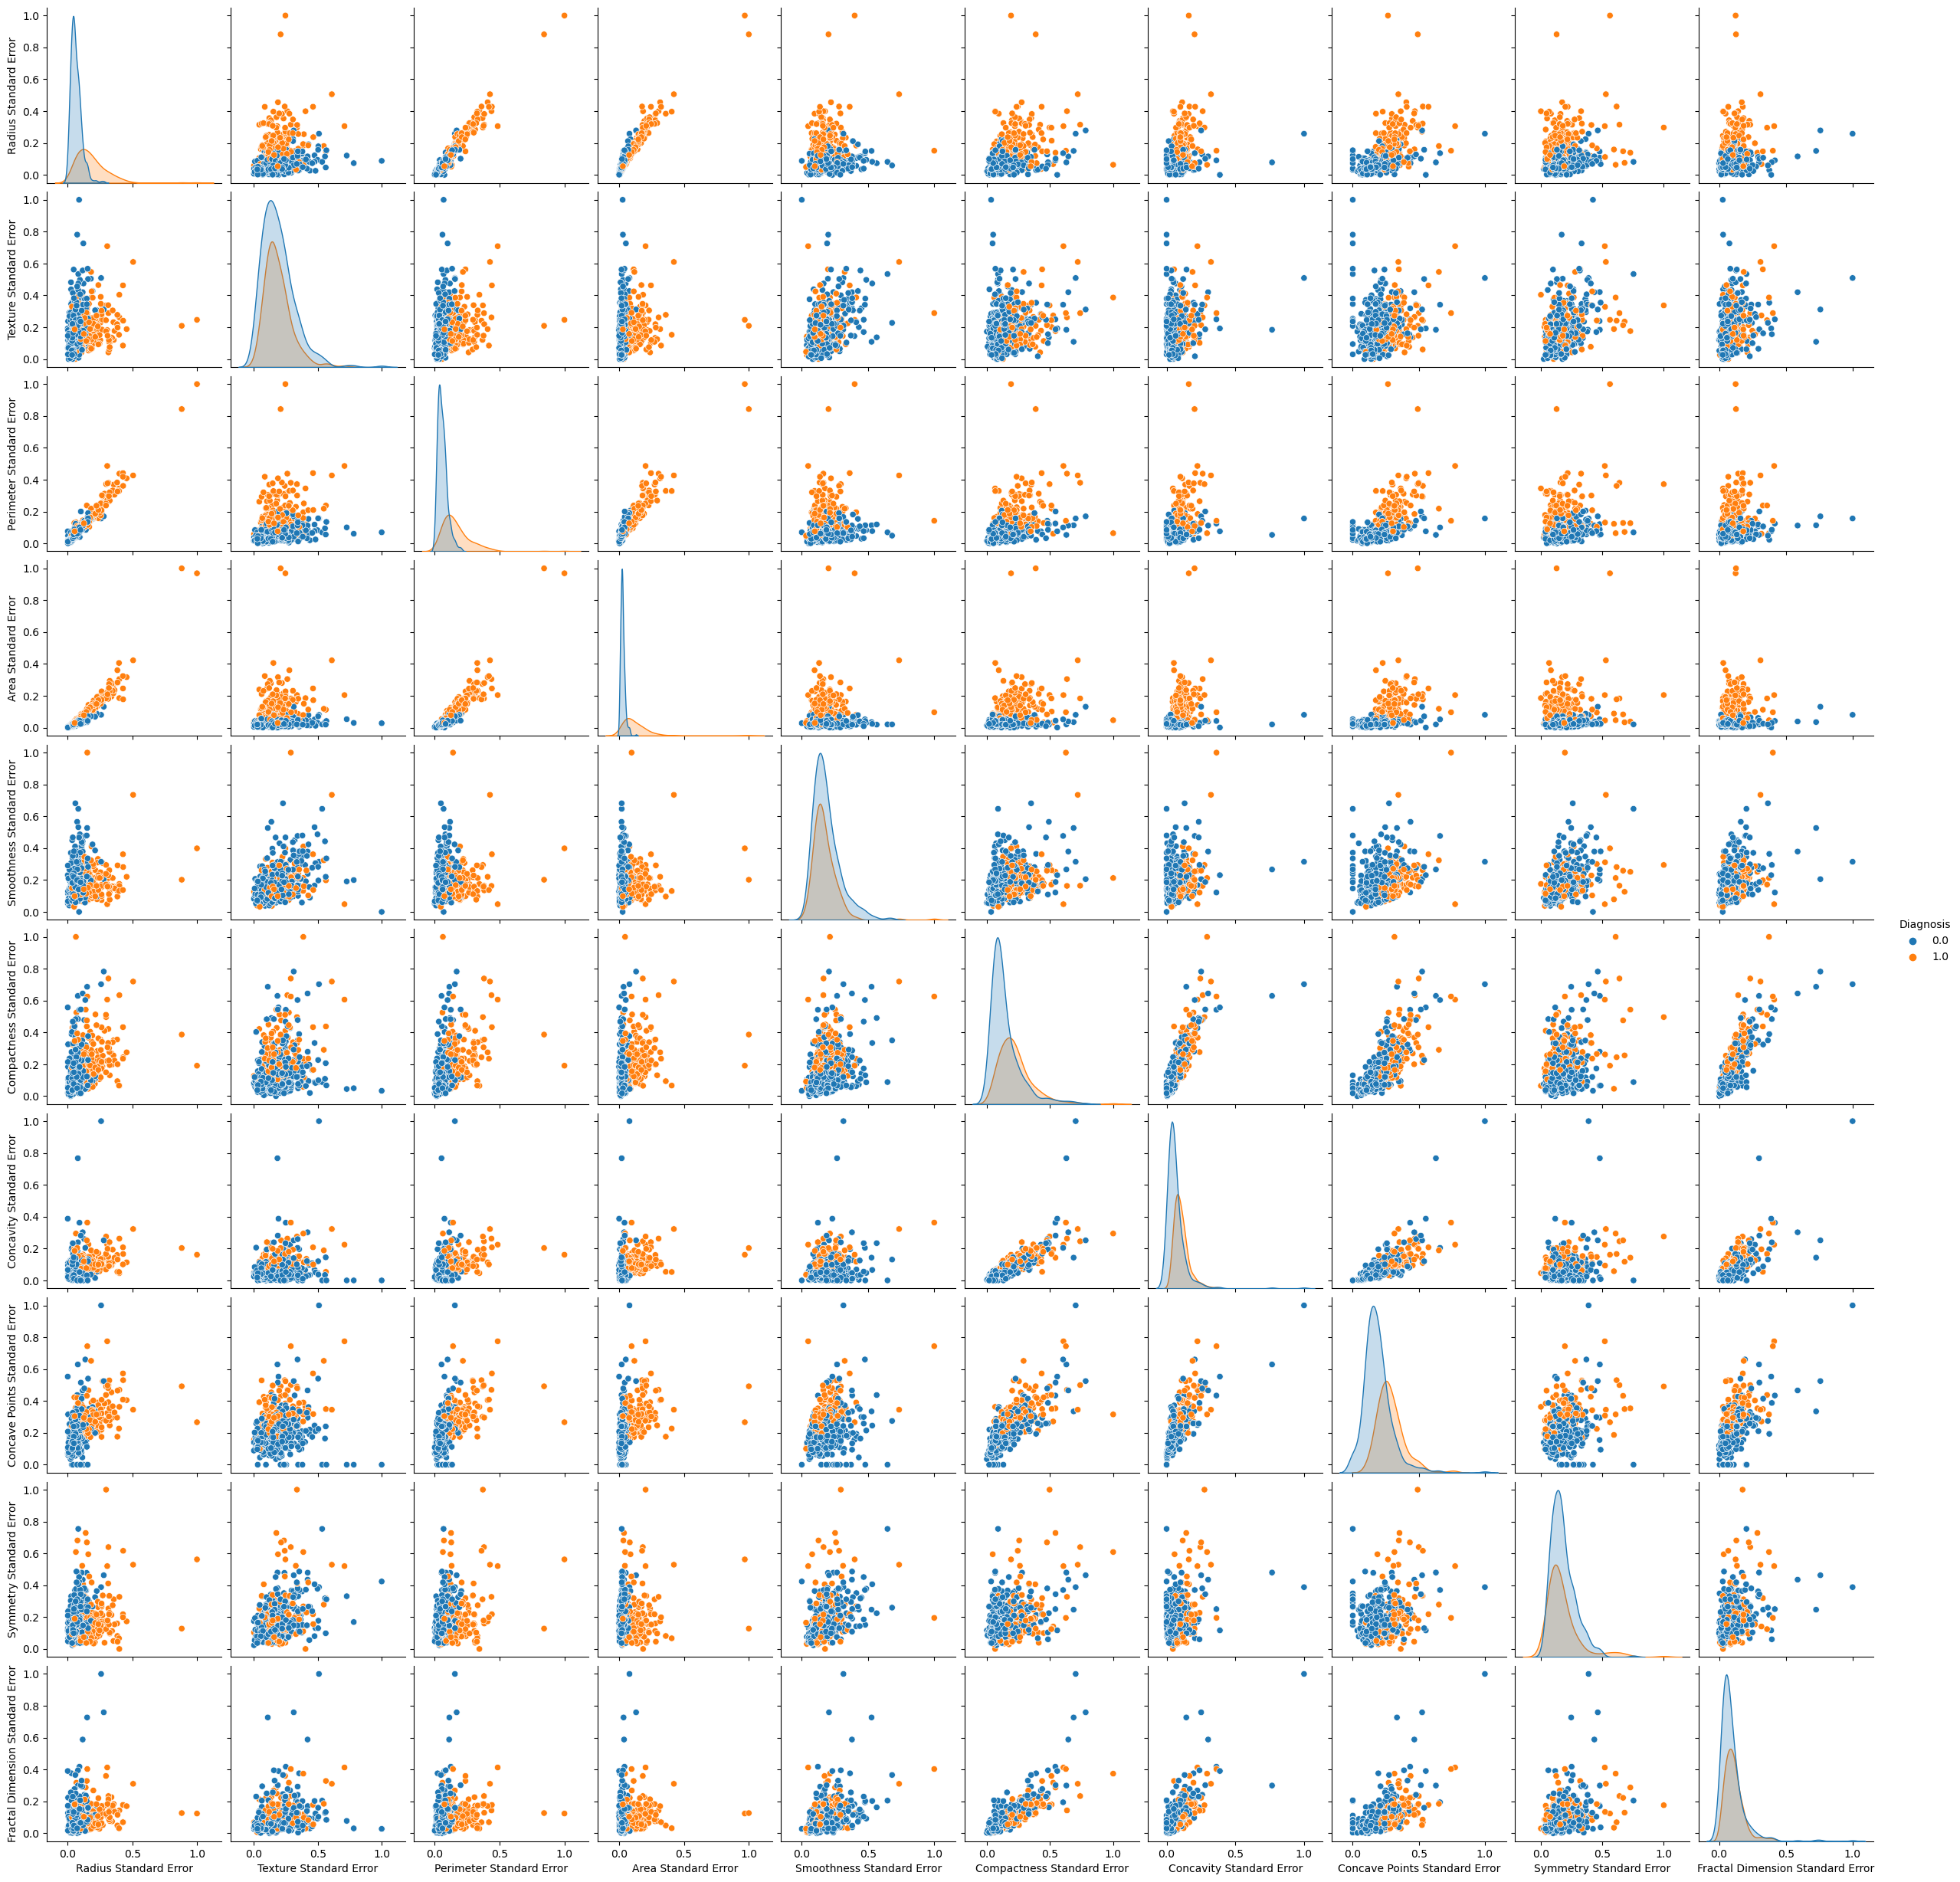

In [78]:
cols = ['Diagnosis', 
        'Radius Standard Error', 
        'Texture Standard Error', 
        'Perimeter Standard Error', 
        'Area Standard Error', 
        'Smoothness Standard Error', 
        'Compactness Standard Error', 
        'Concavity Standard Error', 
        'Concave Points Standard Error', 
        'Symmetry Standard Error', 
        'Fractal Dimension Standard Error'] 
sns.pairplot(scaled_df[cols], hue = 'Diagnosis');

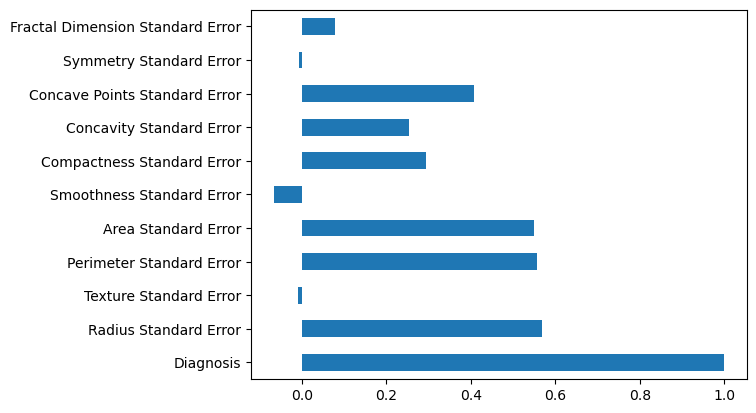

In [79]:
scaled_df[cols].corrwith(scaled_df['Diagnosis']).plot(kind='barh');

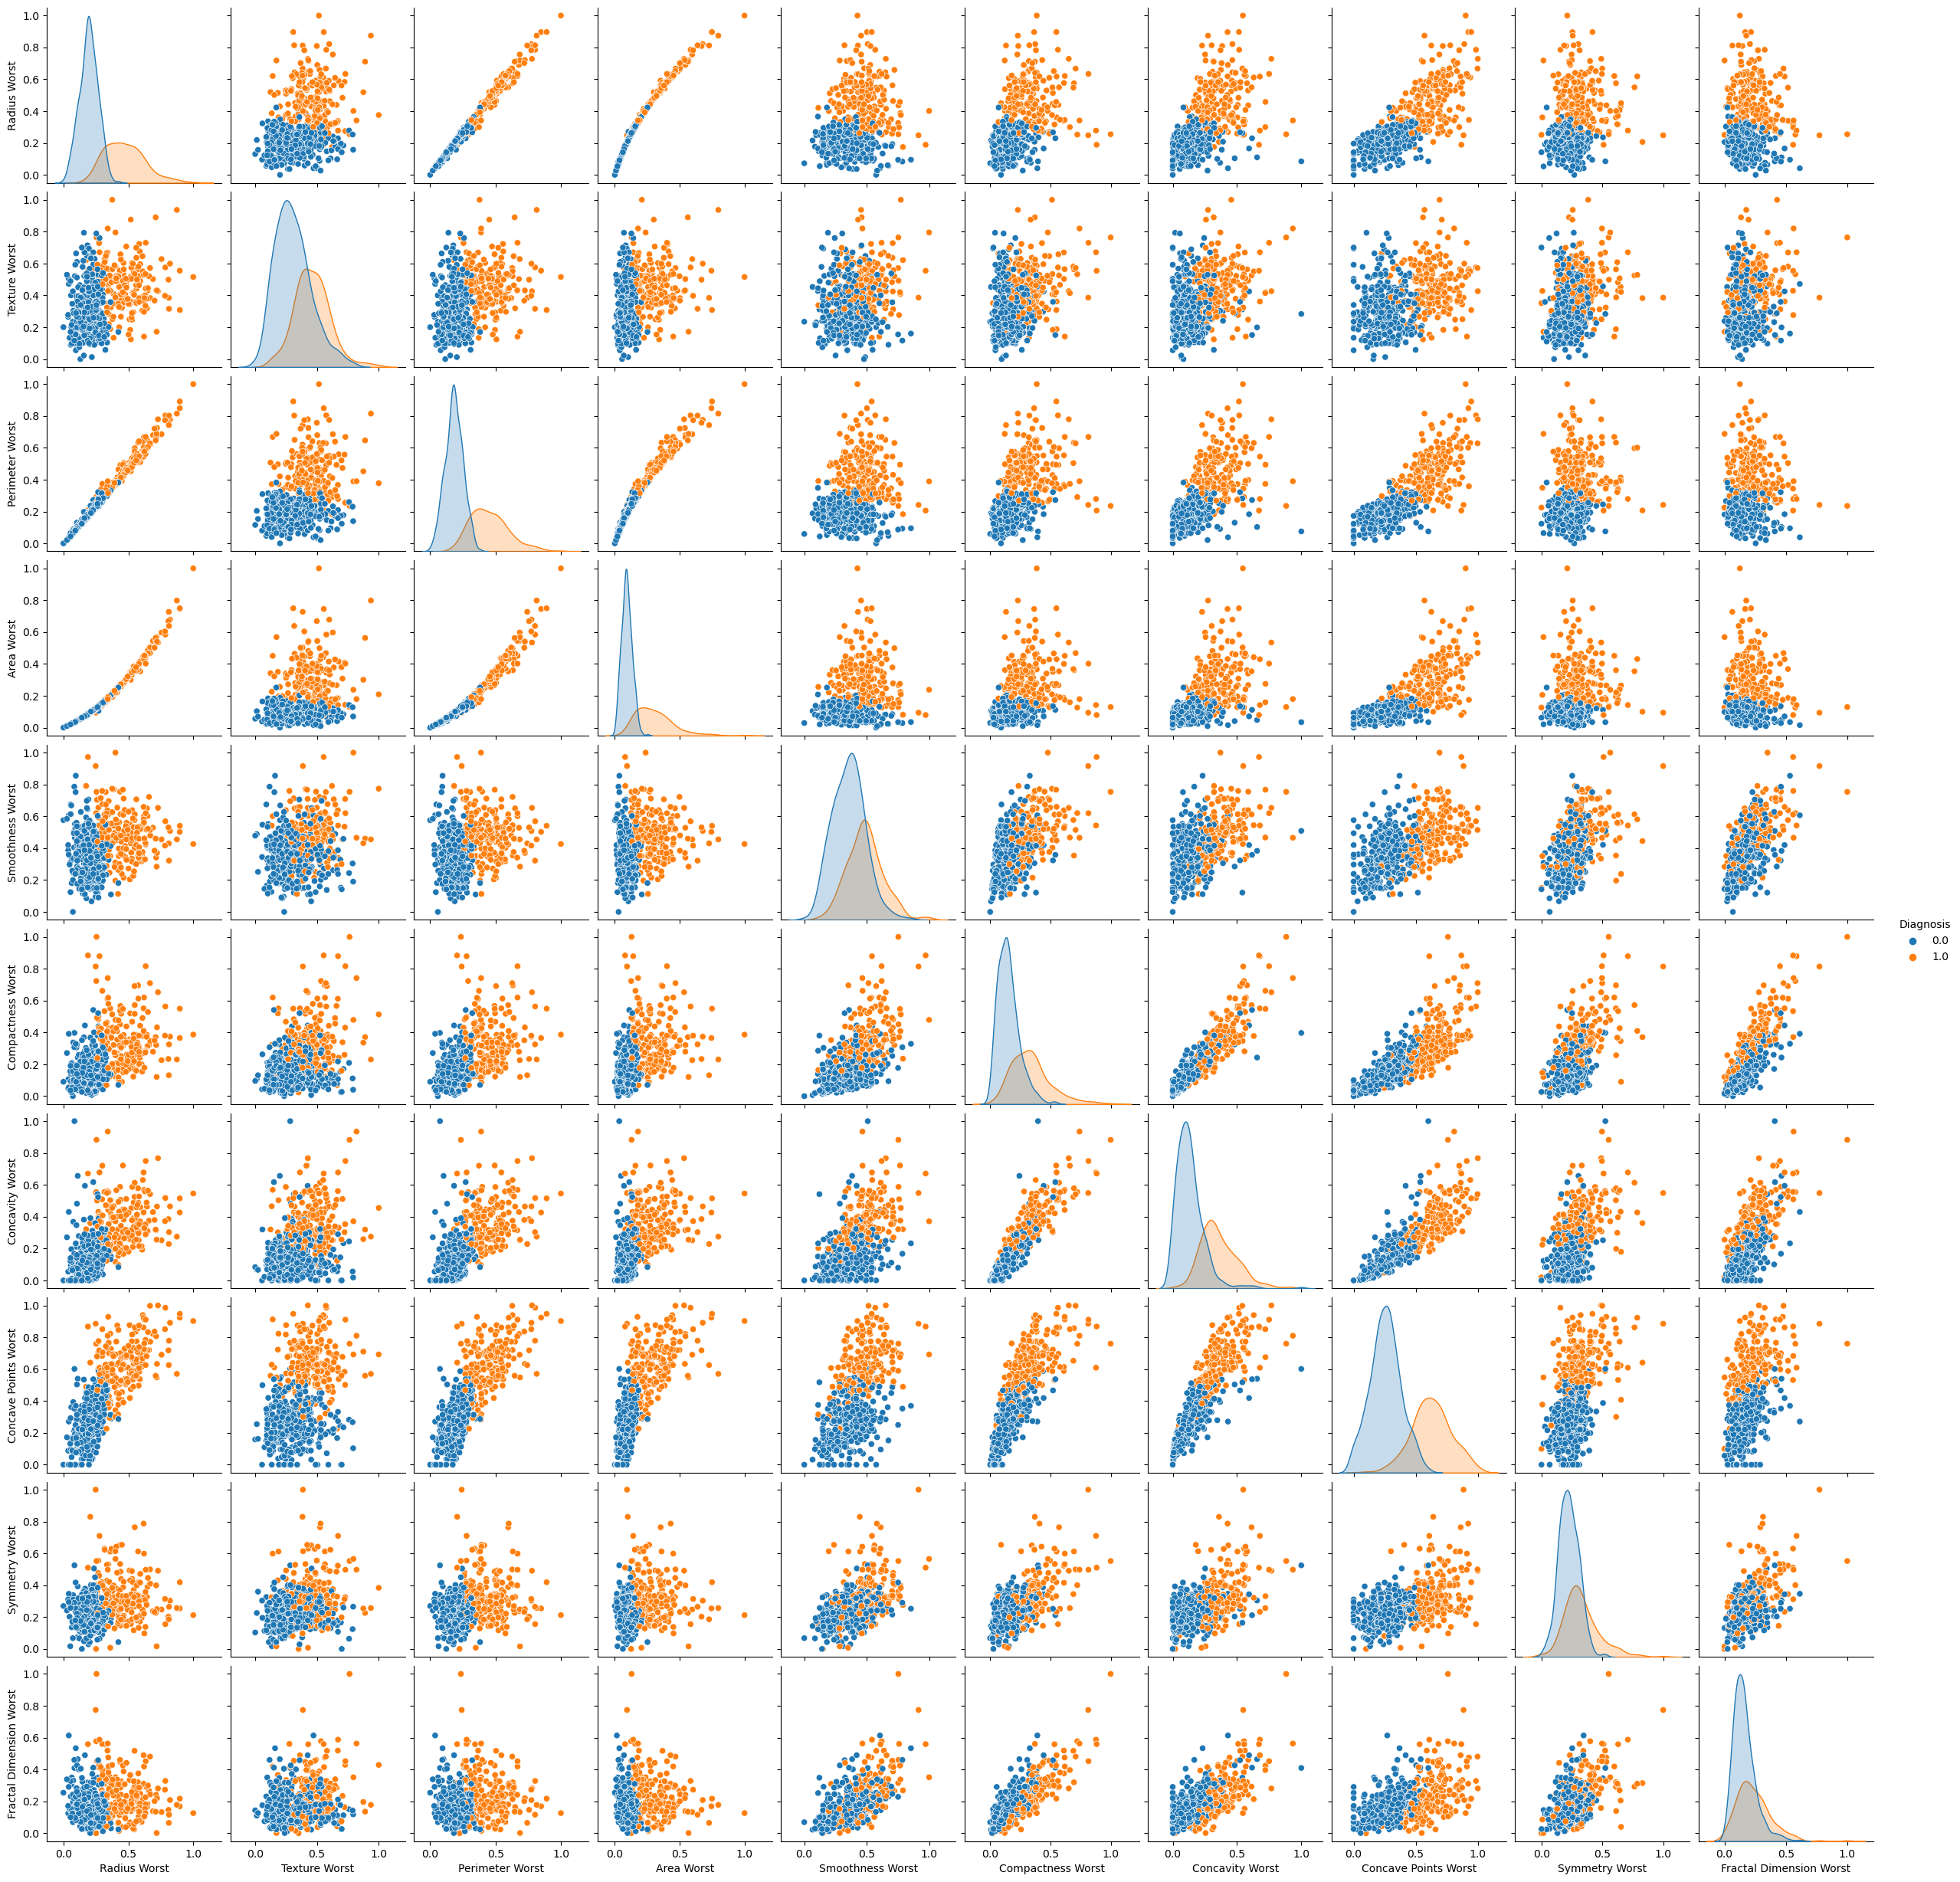

In [80]:
cols = ['Diagnosis', 
        'Radius Worst', 
        'Texture Worst', 
        'Perimeter Worst', 
        'Area Worst', 
        'Smoothness Worst', 
        'Compactness Worst', 
        'Concavity Worst', 
        'Concave Points Worst', 
        'Symmetry Worst', 
        'Fractal Dimension Worst'] 
sns.pairplot(scaled_df[cols],hue = 'Diagnosis');

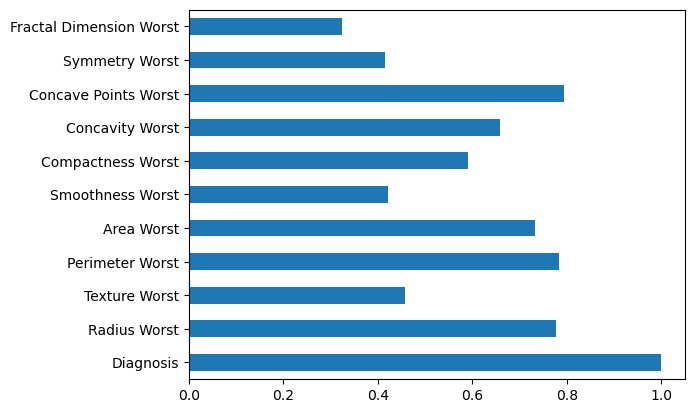

In [81]:
scaled_df[cols].corrwith(scaled_df['Diagnosis']).plot(kind='barh');